In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df= pd.read_csv('./BARC_FINAL_PRED.csv', index_col =0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,179.639999,186.199997,175.000000,183.139999,167.392426,114494137
2020-01-08,181.119995,184.800003,179.199997,181.000000,165.436432,132717233
2020-01-15,180.800003,181.707993,172.500000,174.399994,159.403931,210368898
2020-01-22,175.360001,175.990005,169.199997,172.020004,157.228607,149952316
2020-01-29,173.199997,173.600006,167.839996,172.000000,157.210327,134106079
...,...,...,...,...,...,...
2022-07-13,150.360001,159.600006,145.160004,158.220001,156.122955,249089913
2022-07-20,158.539993,161.889999,155.899994,156.880005,154.800720,303062093
2022-07-27,157.460007,162.080002,149.300003,160.020004,157.899094,414614519


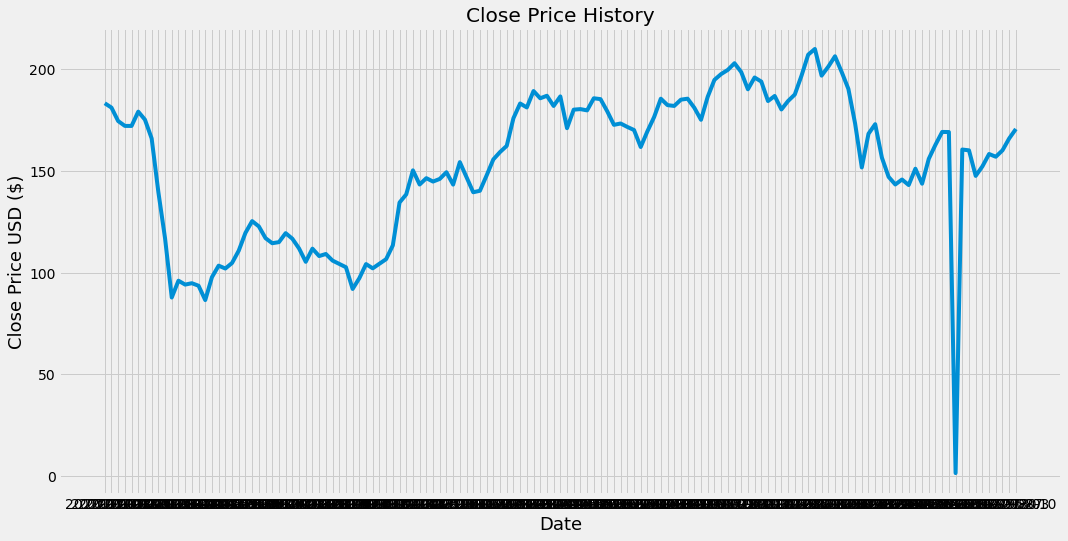

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df[ 'Close' ])


plt.xlabel( 'Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt. show()


In [ ]:
df.shape

(137, 6)

In [ ]:
#Create a new dataframe with only the'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

110

In [ ]:
#Scale the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.87196995],
       [0.86169298],
       [0.8299976 ],
       [0.81856811],
       [0.81847204],
       [0.85218439],
       [0.83326322],
       [0.78898576],
       [0.66268456],
       [0.55357569],
       [0.41392406],
       [0.45359125],
       [0.44441883],
       [0.44768441],
       [0.44172954],
       [0.40792115],
       [0.46194733],
       [0.48903245],
       [0.48230918],
       [0.49537152],
       [0.5244736 ],
       [0.5663499 ],
       [0.59410734],
       [0.5816213 ],
       [0.55386386],
       [0.54195407],
       [0.54454733],
       [0.56567758],
       [0.55261524],
       [0.52966013],
       [0.49815687],
       [0.5291799 ],
       [0.51169944],
       [0.51659779],
       [0.50103827],
       [0.49325848],
       [0.48538267],
       [0.43414185],
       [0.45949813],
       [0.49277825],
       [0.48278941],
       [0.49345058],
       [0.50439987],
       [0.53686362],
       [0.63790453],
       [0.65711384],
       [0.71378131],
       [0.680

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append (train_data[i-60:i,0])
  y_train.append (train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.87196995, 0.86169298, 0.8299976 , 0.81856811, 0.81847204,
       0.85218439, 0.83326322, 0.78898576, 0.66268456, 0.55357569,
       0.41392406, 0.45359125, 0.44441883, 0.44768441, 0.44172954,
       0.40792115, 0.46194733, 0.48903245, 0.48230918, 0.49537152,
       0.5244736 , 0.5663499 , 0.59410734, 0.5816213 , 0.55386386,
       0.54195407, 0.54454733, 0.56567758, 0.55261524, 0.52966013,
       0.49815687, 0.5291799 , 0.51169944, 0.51659779, 0.50103827,
       0.49325848, 0.48538267, 0.43414185, 0.45949813, 0.49277825,
       0.48278941, 0.49345058, 0.50439987, 0.53686362, 0.63790453,
       0.65711384, 0.71378131, 0.68035715, 0.69534039, 0.68736851,
       0.69351549, 0.70936318, 0.68016502, 0.73318275, 0.69774156,
       0.6621083 , 0.66566198, 0.70177549, 0.73952178, 0.75690618])]
[0.7715052925744702]

[array([0.87196995, 0.86169298, 0.8299976 , 0.81856811, 0.81847204,
       0.85218439, 0.83326322, 0.78898576, 0.66268456, 0.55357569,
       0.41392406, 0.45359125, 0.444

In [ ]:
x_train , y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape( x_train ,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(50, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add (LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add (Dense(12) )
model.add (Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
25/25 [==============================] - 9s 82ms/step - loss: 0.1082
Epoch 2/2
25/25 [==============================] - 2s 68ms/step - loss: 0.0053


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)) :
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test ,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(27, 60, 1)

In [ ]:
#now lets get the model predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions- y_test )**2 )
rmse

26.150919408528647

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


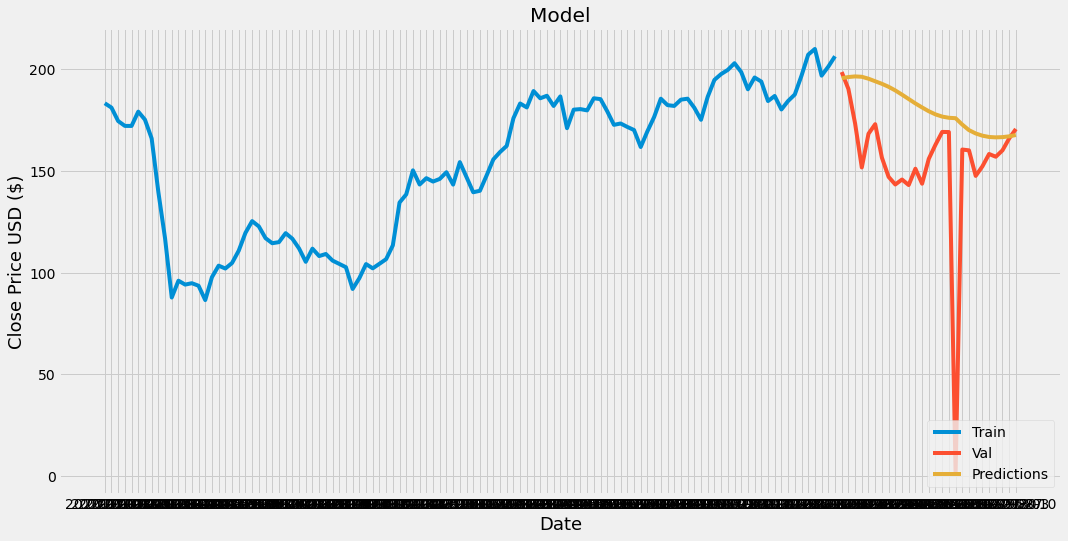

In [ ]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel ('Date', fontsize=18)
plt.ylabel ('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt. legend(['Train','Val', 'Predictions'], loc='lower right')
plt. show()

In [ ]:
valid

,Close,Predictions
Date,,
2022-02-09,198.460007,195.441330
2022-02-16,190.160004,196.004013
2022-02-23,173.220001,196.317245
2022-03-02,151.619995,196.135178
2022-03-09,168.160004,195.187286
2022-03-16,172.860001,193.933517
2022-03-23,156.440002,192.681427
2022-03-30,147.000000,191.221313
2022-04-06,143.259995,189.429947
